# Data 

The Pima Indians dataset is about the prediction of diabetes . This is a small dataset available from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

**Attribute Information:**

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1) (diabetes mellitus)

In [125]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

In [126]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [127]:
# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

In [128]:
print("dataset ndim: ", dataset.ndim)
print("dataset shape:", dataset.shape)
print("dataset size: ", dataset.size)

dataset ndim:  2
dataset shape: (768, 9)
dataset size:  6912


In [129]:
# split dataset into input (X) and output (Y) variables
# output is the last column
X = dataset[:,0:8]
y = dataset[:,[8]]

In [130]:
print("y dataset ndim: ", y.ndim)

print("y dataset size: ", y.size)

y dataset ndim:  2
y dataset size:  768


In [131]:
# print the shape of x
#
print("X dataset shape:", X.shape)

X dataset shape: (768, 8)


In [132]:
# save to number of input dimensions in input_dim
input_dim = X.shape[1]
input_dim

8

In [133]:
# shape of y
print("y dataset shape:", y.shape)

y dataset shape: (768, 1)


In [134]:
y=to_categorical(y,2)

In [135]:
# Create training and test sets
# Test size should be 15%
# The test and train set should be stratified
# use a random state (for reproducability) of 42
# TODO
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15, random_state=42)

In [136]:
# shape of X_test
print("y dataset shape:", X_test.shape)
print("y dataset shape:", X_train.shape)

y dataset shape: (116, 8)
y dataset shape: (652, 8)


# Model

In [137]:
# 1. Create Sequential model
# 2. + 3. Add two hidden dense layers with 12 and 8 nodes. Both should have Relu activations 
# 4. Add a final output layer
# Think about how many nodes the final output layer should have and what activation function is appropiate
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(2, activation='softmax'))

In [138]:
# Compile the model
# Think about what loss function is appropiate
# Use as the optimizer Adam
# Track as an additional metric Accuracy
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [139]:
# Fit the model
#
# Use 15% for Validation
# Train for 300 epochs
# User batch size = 10
# Save the model fitting into the variable history
model.save('model_file.h5')
history = model.fit(X_train, y_train, batch_size=10, epochs=300,validation_split=0.15)

Train on 554 samples, validate on 98 samples
Epoch 1/300
554/554 [==============================] - 1s 2ms/step - loss: 1.9069 - acc: 0.5578 - val_loss: 1.2489 - val_acc: 0.5102
Epoch 2/300
554/554 [==============================] - 0s 229us/step - loss: 1.0279 - acc: 0.6065 - val_loss: 1.1178 - val_acc: 0.5612
Epoch 3/300
554/554 [==============================] - 0s 256us/step - loss: 0.8696 - acc: 0.6408 - val_loss: 0.8872 - val_acc: 0.6224
Epoch 4/300
554/554 [==============================] - 0s 210us/step - loss: 0.7429 - acc: 0.6805 - val_loss: 0.7918 - val_acc: 0.6633
Epoch 5/300
554/554 [==============================] - 0s 341us/step - loss: 0.7156 - acc: 0.6877 - val_loss: 0.7828 - val_acc: 0.6633
Epoch 6/300
554/554 [==============================] - 0s 315us/step - loss: 0.7614 - acc: 0.6498 - val_loss: 0.7696 - val_acc: 0.7041
Epoch 7/300
554/554 [==============================] - 0s 262us/step - loss: 0.7023 - acc: 0.6859 - val_loss: 0.7563 - val_acc: 0.5816
Epoch 8/300


In [140]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


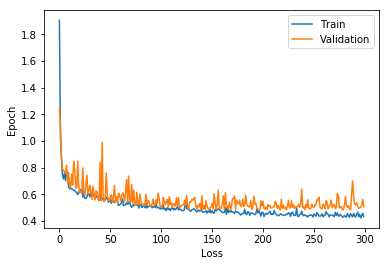

In [141]:
# Plot the History of Training Loss (history.history['loss']) and the Validation Loss (history.history['val_loss'])
# Title should be "Model Loss"
# x label: "Loss"
# y label: "Epoch"
# Legend: "Train" and "Validation"
plt.plot(history.history['loss'],  label='linear')
plt.plot(history.history['val_loss'], label='linear')


# Add a legend
plt.legend(["Train" , "Validation"])

# Show the plot
plt.xlabel('Loss')
plt.ylabel('Epoch')

plt.show()

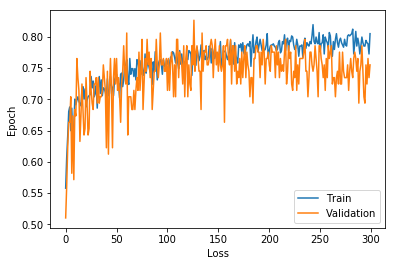

In [142]:
# Plot the History of Training Accuracy (history.history['acc']) and 
# the Validation Accuracy (history.history['val_acc'])
#
# Title should be "Model Accuracy"
# x label: "Accuracy"
# y label: "Epoch"
# Legend: "Train" and "Validation"
plt.plot(history.history['acc'],  label='linear')
plt.plot(history.history['val_acc'], label='linear')


# Add a legend
plt.legend(["Train" , "Validation"])

# Show the plot
plt.xlabel('Loss')
plt.ylabel('Epoch')

plt.show()

In [143]:
# Evaluate the loss and accuracy on the test data
loss, accuracy = model.evaluate(X_test, y_test)

116/116 [==============================] - 0s 64us/step


In [144]:
print('Test score:', loss)
print('Test accuracy:', accuracy)

Test score: 0.5059786274515349
Test accuracy: 0.7758620689655172
